In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd

twit=pd.read_csv("twitter_dataset.csv")
twit

,Unnamed: 0,tweet,sentiment
0,0,is upset that he can't update his Facebook by ...,0.0
1,1,@Kenichan I dived many times for the ball. Man...,0.0
2,2,my whole body feels itchy and like its on fire,0.0
3,3,"@nationwideclass no, it's not behaving at all....",0.0
4,4,@Kwesidei not the whole crew,0.0
...,...,...,...
3142398,3142398,"With ad revenues falling, what’s the impact on...",2.0
3142399,3142399,RT @KelvinSCWong: Well another point to add to...,2.0
3142400,3142400,$ITOX working on a contract with a fortune 500...,2.0
3142401,3142401,"$DIS it could break the 120 pin, then 125&gt; ...",2.0


In [4]:
# Import the required libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Load and preprocess the dataset

# Load the dataset into a pandas DataFrame
df = pd.read_csv("twitter_dataset.csv")

# Remove unnecessary columns
df = df[['tweet', 'sentiment']]

# Remove any rows with missing values
df.dropna(inplace=True)

# Convert sentiment values to integers
df['sentiment'] = df['sentiment'].astype(int)

In [5]:
df

,tweet,sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
3142398,"With ad revenues falling, what’s the impact on...",2
3142399,RT @KelvinSCWong: Well another point to add to...,2
3142400,$ITOX working on a contract with a fortune 500...,2
3142401,"$DIS it could break the 120 pin, then 125&gt; ...",2


In [8]:
# Split the dataset into training and testing sets

X = df['tweet']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Vectorize the tweets using TF-IDF

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [10]:
# Train a sentiment analysis model (Logistic Regression)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\ABINAYA THULSI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
# Evaluate the model

y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    314658
           1       0.80      0.81      0.80    311677
           2       0.72      0.68      0.70      2130

    accuracy                           0.80    628465
   macro avg       0.77      0.76      0.77    628465
weighted avg       0.80      0.80      0.80    628465



In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the tweets for each sentiment category
positive_tweets = df[df['sentiment'] == 1]['tweet']
negative_tweets = df[df['sentiment'] == 0]['tweet']
neutral_tweets = df[df['sentiment'] == 2]['tweet']

# Generate word clouds for each sentiment category
positive_wordcloud = WordCloud().generate(' '.join(positive_tweets))
negative_wordcloud = WordCloud().generate(' '.join(negative_tweets))
neutral_wordcloud = WordCloud().generate(' '.join(neutral_tweets))

# Plot the word clouds
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Positive Sentiment')
axs[0].axis('off')

axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Negative Sentiment')
axs[1].axis('off')

axs[2].imshow(neutral_wordcloud, interpolation='bilinear')
axs[2].set_title('Neutral Sentiment')
axs[2].axis('off')

plt.show()

AttributeError: 'ImageDraw' object has no attribute 'textbbox'

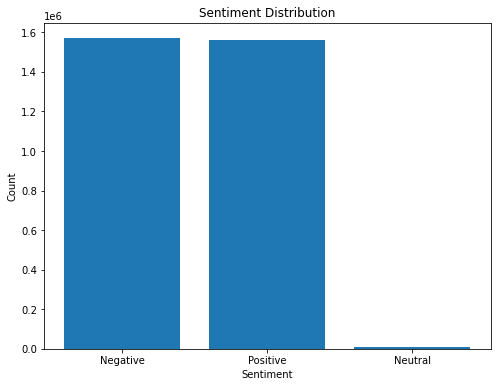

In [14]:
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(sentiment_counts.index, ['Negative', 'Positive', 'Neutral'])
plt.title('Sentiment Distribution')
plt.show()

In [23]:
# Preprocess and vectorize new data
new_tweets = ["I enjoy this product!", "I m really disappointed with the service."]
new_tweets_vectorized = vectorizer.transform(new_tweets)

# Predict sentiment using the trained model
new_tweets_sentiments = model.predict(new_tweets_vectorized)

# Print the predicted sentiments
for tweet, sentiment in zip(new_tweets, new_tweets_sentiments):
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment}\n")

Tweet: I enjoy this product!
Predicted Sentiment: 1

Tweet: I m really disappointed with the service.
Predicted Sentiment: 0



In [ ]:
https://www.kaggle.com/code/anoopjohny/twitter-data-analysis